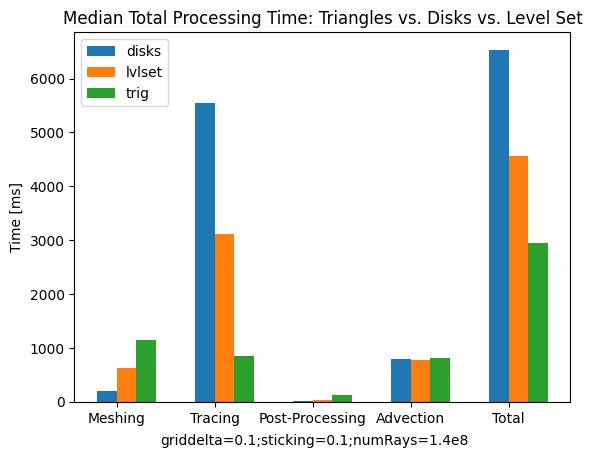

In [5]:
import matplotlib.pyplot as plt
import numpy as np

processSteps = 10

files = ["disks", "lvlset", "trig"]
labels = ['Meshing', 'Tracing', 'Post-Processing', 'Advection', 'Total']
x = np.arange(len(labels))
width = 0.2

RoI = 5  # Run of Interest 5: 140.000.000 Rays

fig, ax = plt.subplots()
for i, file in enumerate(files):
  data = np.loadtxt(f'data/{file}.txt', delimiter=';', skiprows=1)[RoI*processSteps:(RoI+1)*processSteps, 1:5]
  median = np.median(data, axis=0)
  total = np.sum(median)
  medianWithTotal = np.append(median, total)
  bars = ax.bar(x + i * width, medianWithTotal * 1e-6, width, label=file)

ax.set_ylabel('Time [ms]')
ax.set_title('Median Total Processing Time: Triangles vs. Disks vs. Level Set')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.figtext(0.5, 0.02,
            "griddelta=0.1;sticking=0.1;numRays=1.4e8",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('bench_compare.png', bbox_inches="tight")
plt.show()

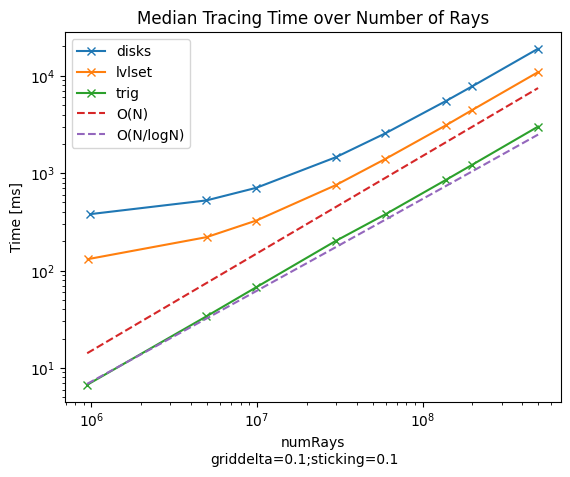

In [6]:
files = ["disks", "lvlset", "trig"]
runs = 8

fig, ax = plt.subplots()
for file in files:
  bench = np.loadtxt(f"data/{file}.txt", skiprows=1, delimiter=";")[:, 1:]
  medians = np.empty((0, 5))
  numRays = []
  for i in range(runs):
    run = bench[i * processSteps:(i + 1) * processSteps]
    medianTime = np.median(run[:, :4], axis=0)
    medianTime = np.append(medianTime, np.sum(medianTime))
    medians = np.vstack([medians, medianTime])
    numRays.append(np.average(run[:, -1]))
  numRays = np.array(numRays)
  plt.loglog(numRays, medians[:, 1] * 1e-6, marker="x", label=file)

plt.plot(numRays, 1.5e-5*numRays, ls="--", label="O(N)")
plt.plot(numRays, 1e-4*(numRays / np.log(numRays)), ls="--", label="O(N/logN)")
plt.xlabel("numRays")
plt.ylabel("Time [ms]")
plt.title("Median Tracing Time over Number of Rays")
plt.legend()
plt.figtext(0.5, -0.02,
            "griddelta=0.1;sticking=0.1",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('bench_varyRays.png', bbox_inches="tight")
plt.show()

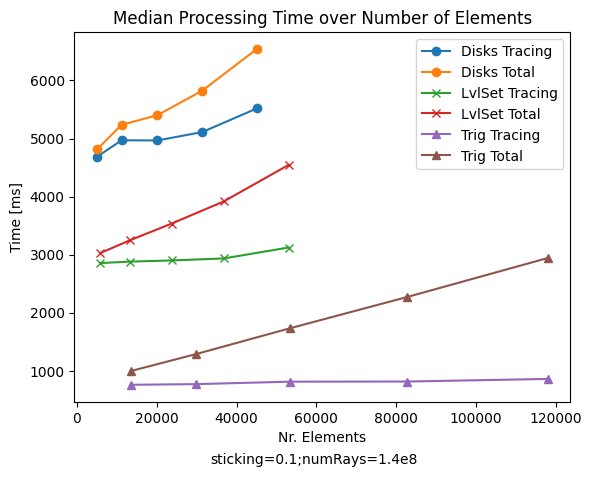

In [7]:
files = ["disks_vardelta", "lvl_vardelta", "trig_vardelta"]
labels = ["Disks", "LvlSet", "Trig"]
markers = ["o", "x", "^"]
runs = 5

for i, file in enumerate(files):
  bench = np.loadtxt(f"data/{file}.txt", skiprows=1, delimiter=";")[:, 1:]
  medians = np.empty((0, 5))
  numNodes = []
  for j in range(runs):
    run = bench[j * processSteps:(j + 1) * processSteps]
    medianTime = np.median(run[:, :4], axis=0)
    medianTime = np.append(medianTime, np.sum(medianTime))
    medians = np.vstack([medians, medianTime])
    numNodes.append(np.average(run[:, -1]))
  numNodes = np.array(numNodes)
  plt.plot(numNodes, medians[:, 1] * 1e-6, marker=markers[i], label=f"{labels[i]} Tracing")
  plt.plot(numNodes, medians[:, -1] * 1e-6, marker=markers[i], label=f"{labels[i]} Total")

plt.xlabel("Nr. Elements")
plt.ylabel("Time [ms]")
plt.title("Median Processing Time over Number of Elements")
plt.legend()
plt.figtext(0.5, -0.02,
            "sticking=0.1;numRays=1.4e8",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('bench_varyDelta.png', bbox_inches="tight")
plt.show()